<a href="https://colab.research.google.com/github/shabnazghaffari/LaboratoryOfComputationalPhysics_Y4/blob/main/shab_max.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **P02 - Naive Bayes classifier for Fake News recognition**
**Advanced Statistics 4 Physics Analysis 2023 - Group Assignment** <br>
Shabnaz Ghaffari (2040475)<br>
Maximilian Theodor Peter (2089859)

## **0 - Assignment Description**

*Description:* <br>
<hr style="border:2px solid gray">
Fake news are defined by the New York Times as ”a made-up story with an intention to deceive”, with the intent to confuse or deceive people. They are everywhere in our daily life, and come especially from social media platforms and applications in the online world. Being able to distinguish fake contents form real news is today one of the most serious challenges facing the news industry. Naive Bayes classifiers [1] are powerful algorithms that are used for text data analysis and are connected to classification tasks of text in multiple classes. The goal of the project is to implement a Multinomial Naive Bayes classifier in R and test its performances in the classification of social media posts.

*Bibliography / Data Source:*<br>
<hr style="border:2px solid gray">
[1] C. D. Manning, Chapter 13, Text Classification and Naive Bayes, in Introduction to Information Retrieval, Cambridge University Press, 2008 <br>
[2] Fake News Content Detection, KAGGLE data set: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv <br>
[3] Fake News: build a system to identify unreliable news articles https://www.kaggle.com/competitions/fake-news/data?select=train.csv


*Dataset Comment:* <br>
<hr style="border:2px solid gray">
Dataset [2] consists of a training set wth 10,240 instances and a test set with 1,267 instances. The test set is unlabelled, the training set is labelled as followed: <br>

| classifier | label|
|------------|-------|
| true  | 5          |
| mostly true | 3    |
| half true   | 2    |
| barely true | 0    |
| false | 1          |
| unknown | 4        |


Dataset [3] is completely unrelated to datasets [2] and has 20,799 instances, labelled as: <br>

| classifier | label|
|------------|-------|
| reliable  | 1      |
| unreliable | 0     |


## **1 - Approach and Overview**


### **1.1 - Part 1: Normal NBC**

First we are creating a Naive Bayesian Classifier from scratch.<br>
Second we are using the R library "e1071" for comparison.

### **1.2 - Part 2: Binominal & Gaussian NBC**

The labels in the training dataset were meant to be seen independent in an NBC. The degree of truthfulness is no a spectrum and unknown is not part of this spectrm. So we choose to split the labels into 2 dimensions: known and true. This opens up a little more fun analysis for binominal label "known" and continuous "true".




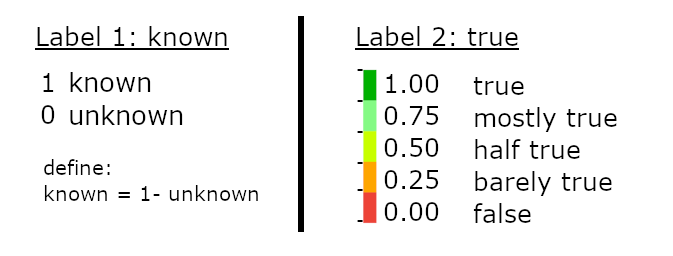

This makes further sense for this assignment as we want to check dataset [3] that only provides the two labels "reliable" and "unreliable". We look at the results independently regarding "known" and "true" and will try to get these 2 parameter together as reliability can be seen as to which certainty we can say how true the text is.

### **1.3 - Expected Problems**


*Available Information:* <br>
<hr style="border:2px solid gray">
Generally it is recommended to include as much relevant information as possible to improve the classifier's performance. Next to the text there main text we have "tags" and later "author" for dataset [3]. <br>
- Tags will be sighted first, then added to the main text.<br>
- As author ist not part of our training data, we can look at the authorslater and try to  find  "fake news spreaders".

*Polarity:* <br>
<hr style="border:2px solid gray">
Polarity in this context is about the negating line of a sentence. As it flips the statement by 180°. For example:<br>
"George Bush is Irish" or "George Bush is **not** Irish"<br>
The NBC will take the word "george" "bush" and "irish" into account as well as "not", in more complex texts the weight of "not" will be most probably not be recognized by the NBC. At this point we  assume that certain buzzwords and word combinations gives us a likelihood of "fake news" rather than detecting the real meaning of a sentence. This shall be considwered when interpreting our results.

*Text length* <br>
<hr style="border:2px solid gray">
training dataset [2] 10 - 20 words<br>
test dataset [3]: 500-1000 words<br>
It is highly expected as [3] is much more complex that our NBC will fail there. Comments will be provided and another take on dataset [3] will be given.

*Sarcasm / Quotes / Trolling:* <br>
<hr style="border:2px solid gray">
Sarcasm and Irony is quite frequent on social media, we don't even know how such posts are labelled. Further quoting some false statement and disregarding it might not be detected as well with a simple method that we use. Last but not least, "trolling" or what can be seen as intentionally deceiving or confusing media posts are frequent in SM and problematic if part of the data.
<br>So in general our results in the end have to be interpreted with a grain of salt.

### **1.4 - Packages**


#### install packages

In [181]:
# INSTALL
install.packages("tm")
install.packages("SnowballC")
install.packages("textstem")
install.packages("ggplot2")
install.packages("quanteda")
install.packages("wordcloud")
install.packages("e1071")
install.packages("gridExtra")
install.packages("caret")
install.packages("tidytext")
install.packages("naivebayes")



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### libraries packages

In [182]:
#for data preparation
library(tm)        #
library(SnowballC) #
library(textstem)  # Stemming words
library(ggplot2)   # Plotting
library(quanteda)  #
library(wordcloud) # Visualize Vocublary
library(e1071)     # NBC
library(gridExtra)
library(caret)
library(tidytext)
library(naivebayes)



## **2 - Data Preparation**

### **2.1 Import Data & Adjust Labels**

#### code

In [183]:
# import
data1_raw <- read.csv("train.csv")
data2_raw <- read.csv("dataset.csv")

In [184]:
#adjusting labels for later easier identification:
unknown    <- 0
false      <- 1
barelytrue <- 2
halftrue   <- 3
mostlytrue <- 4
true       <- 5
known      <- 6


data1 <- data1_raw
# rename
data1$text <- data1$Text
data1$Text <- NULL
data1$text <- paste(data1$text, data1$tag, sep = " ") # add tag to main text
data1$label <- ifelse(data1_raw$Labels == 4, unknown,
                      ifelse(data1_raw$Labels == 1, false,
                             ifelse(data1_raw$Labels == 0, barelytrue,
                                    ifelse(data1_raw$Labels == 2, halftrue,
                                           ifelse(data1_raw$Labels == 3, mostlytrue,
                                                  ifelse(data1_raw$Labels == 5, true, NA)
                                           )
                                    )
                             )
                      )
              )
# add for later part2
data1$true  <- ifelse(data1$label == unknown, NA, data1$label)
data1$known <- ifelse(data1$label > unknown, known, unknown)
#remove
data1$tag <- data1$Text_Tag
data1$Text_Tag <- NULL
data1$Labels <- NULL
data1$tag <- NULL

In [185]:
 data2_raw <- read.csv("dataset.csv")
 data2 <- data2_raw
 data2$text <- paste(data2$text, data2$title, sep = " ") # add title to main text
 data2 <- data2[, !(names(data2) == "id")]
 data2 <- data2[, !(names(data2) == "title")]
 data2 <- data2[, !(names(data2) == "author")]

#### results

In [186]:
head(data1, 5)
head(data2, 1)

,text,label,true,known
,<chr>,<dbl>,<dbl>,<dbl>
1,Says the Annies List political group supports third-trimester abortions on demand.,1,1,6
2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,3,3,6
3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",4,4,6
4,Health care reform legislation is likely to mandate free sex change surgeries.,1,1,6
5,The economic turnaround started at the end of my term.,3,3,6


text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### **2.2 Inspect Data**

#### code

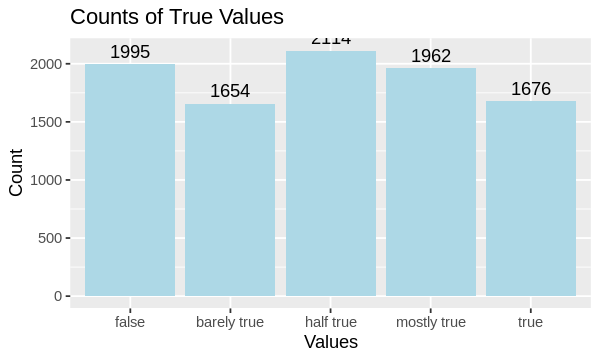

In [187]:
counts <- table(data1$label)
df_counts <- data.frame(Value = as.numeric(names(counts)), Count = as.numeric(counts))

counts_known <- table(data1$known)
df_counts_known <- data.frame(Value = as.numeric(names(counts_known)), Count = as.numeric(counts_known))

counts_true <- table(data1$true)
df_counts_true <- data.frame(Value = as.numeric(names(counts_true)), Count = as.numeric(counts_true))

# "all" plot
plot <- ggplot(df_counts, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count", title = "Counts of Values") +
  scale_x_discrete(labels = c("unknown", "false", "barely true", "half true", "mostly true", "true"))

# "known" plot
plot_known <- ggplot(df_counts_known, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count", title = "Counts of Known Values") +
  scale_x_discrete(labels = c("unknown", "known"))

# "true" plot
plot_true <- ggplot(df_counts_true, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count", title = "Counts of True Values") +
  scale_x_discrete(labels = c("false", "barely true", "half true", "mostly true", "true"))

# Prepare the plots
plot <- print(plot, newpage = FALSE)
plot_known <- print(plot_known, newpage = FALSE)
plot_true <- print(plot_true, newpage = FALSE)


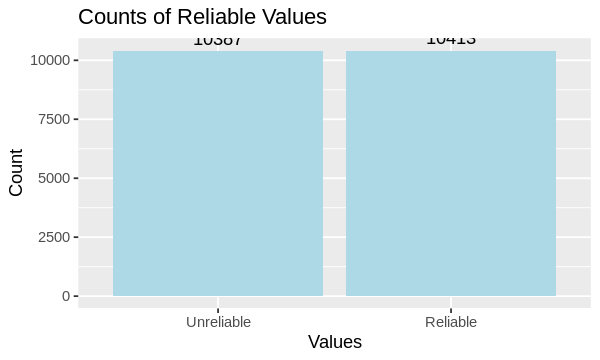

In [188]:
counts_known <- table(data2$label)
df2_counts_label <- data.frame(Value = as.numeric(names(counts_known)), Count = as.numeric(counts_known))

# Create a histogram for known values with data callouts
plot_label <- ggplot(df2_counts_label, aes(x = factor(Value), y = Count)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  geom_text(aes(label = Count), vjust = -0.5, color = "black") +
  labs(x = "Values", y = "Count", title = "Counts of Reliable Values") +
  scale_x_discrete(labels = c("Unreliable", "Reliable"))

# Prepare the plot
plot_label <- print(plot_label, newpage = FALSE)

#### Graphs

*Dataset [2]:* <br>
<hr style="border:2px solid gray">

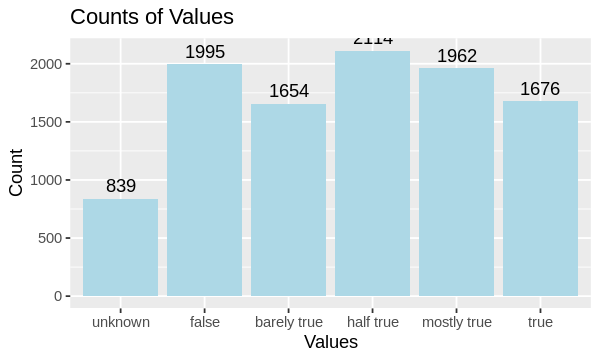

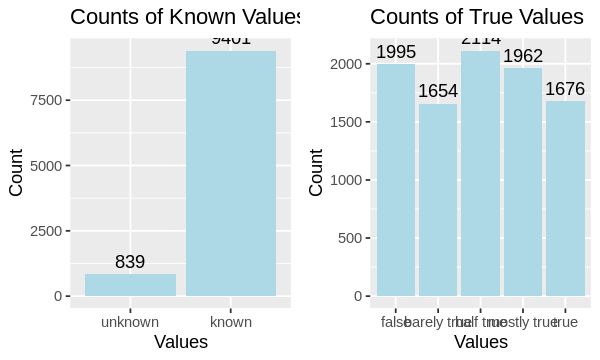

In [189]:
grid.arrange(plot, ncol = 1)
grid.arrange(plot_known, plot_true, ncol = 2)

*Dataset [3]:* <br>
<hr style="border:2px solid gray">

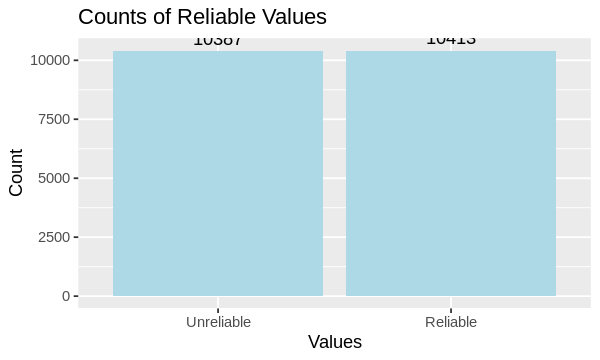

In [190]:
plot_label

### **2.3 Pre-Processing**

#### Code

In [191]:
# DE_CONTRACTION
# - - - - - - - - - - - - - - - - - - - - - - - -
# De-Contraction manually, because library did not work
decontractData <- function(dataset, textColumn) {
  dataset[[textColumn]] <- gsub("don't", "do not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("can't", "can not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("won't", "will not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("couldn't", "could not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("shouldn't", "should not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("doesn't", "does not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("hasn't", "has not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("isn't", "is not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("aren't", "are not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("wasn't", "was not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("weren't", "were not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("haven't", "have not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("hadn't", "had not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("let's", "let us", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("I'm", "I am", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("you're", "you are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("they're", "they are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("he's", "he is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("she's", "she is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("it's", "it is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("you're", "you are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("he's", "he is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("she's", "she is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("it's", "it is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("we're", "we are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("they're", "they are", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("that's", "that is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("there's", "there is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("can't", "cannot", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("don't", "do not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("won't", "will not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("isn't", "is not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("haven't", "have not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("doesn't", "does not", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("let's", "let us", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("it's", "it is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("that's", "that is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("there's", "there is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("here's", "here is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("what's", "what is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("who's", "who is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("how's", "how is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("where's", "where is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("when's", "when is", dataset[[textColumn]])
  dataset[[textColumn]] <- gsub("why's", "why is", dataset[[textColumn]])

    return(dataset)
}

In [192]:
# CLEANING DATA
# - - - - - - - - - - - - - - - - - - - - - - - -
cleanData <- function(dataset, textColumn) {
  # Convert text to lowercase
  dataset[[textColumn]] <- tolower(dataset[[textColumn]])

  # Remove URLs (not sure if needed, just to be sure)
  dataset[[textColumn]] <- gsub("http\\S+|www\\S+", "", dataset[[textColumn]])

  # Remove "-" to make whole words out of it
  dataset[[textColumn]] <- gsub("-", "", dataset[[textColumn]])

  # Convert special apostrophes to regular apostrophes +  Expand contractions
  dataset[[textColumn]] <- gsub("\\’", "'", dataset[[textColumn]], perl = TRUE)

  # Written out numnbers
  dataset[[textColumn]] <- gsub("\\b(?:zero|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fifty|sixty|seventy|eighty|ninety|hundred|thousand|million|billion|trillion)\\b", "", dataset[[textColumn]], ignore.case = TRUE)

  # De-Contraction (manually unfortunately - see above)
  dataset <- decontractData(dataset, textColumn)

  # Replace punctuation with a space (if removed, might get weird word connections)
  dataset[[textColumn]] <- gsub("[[:punct:]]", " ", dataset[[textColumn]])

  # Remove special characters (anything not A-Z, a-z // includes numbers)
  dataset[[textColumn]] <- gsub("[^A-Za-z ]", "", dataset[[textColumn]])

  # ====================================================================
  # make Vector
  dataset[[textColumn]] <- as.character(dataset[[textColumn]])

  # Tokenization
  dataset[[textColumn]] <- strsplit(dataset[[textColumn]], "\\s+")

  # Remove numbers
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    tokens[!grepl("\\d", tokens)]
  })

  # Remove stop words
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    tokens[!(tokens %in% stopwords("english"))]
  })

  # Lemmatization
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    lemmatize_words(tokens)
  })

  # Stemming
  dataset[[textColumn]] <- lapply(dataset[[textColumn]], function(tokens) {
    wordStem(tokens)
  })

  # Convert back to normal text
  dataset[[textColumn]] <- sapply(dataset[[textColumn]], paste, collapse = " ")

  return(dataset)
}

*Preparing all data now:* <br>
<hr style="border:2px solid gray">

In [193]:
data1_cleaned <- cleanData(data1, "text")

In [194]:
# VOCABULARY
# - - - - - - - - - - - - - - - - - - - - - - - -
createVocabulary <- function(dataset, textColumn) {
  tokens_data <- tokens(dataset[[textColumn]], tolower = TRUE)
  dtm <- dfm(tokens_data)
  term_freq <- colSums(dtm)
  vocabulary_data <- data.frame(Word = featnames(dtm), Occurrences = term_freq)
  # Sort occurrences
  vocabulary_data <- vocabulary_data[order(-vocabulary_data$Occurrences), ]

  return(vocabulary_data)
}

#### Show Result

In [195]:
head(data1_cleaned,3)

,text,label,true,known
,<chr>,<dbl>,<dbl>,<dbl>
1,sai anni list polit group support thirdtrimest abort demand,1,1,6
2,declin coal start start natur ga take start begin presid georg w bush administr,3,3,6
3,hillari clinton agre john mccain vote give georg bush benefit doubt iran,4,4,6


### **2.4 Inspect Vocabulary**

#### ALL

In [196]:
voc_text   <- createVocabulary(data1_cleaned,                               "text")
voc_text_1 <- createVocabulary(data1_cleaned[data1_cleaned$true == false, ], "text")
voc_text_2 <- createVocabulary(data1_cleaned[data1_cleaned$true == barelytrue, ], "text")
voc_text_3 <- createVocabulary(data1_cleaned[data1_cleaned$true == halftrue, ], "text")
voc_text_4 <- createVocabulary(data1_cleaned[data1_cleaned$true == mostlytrue, ], "text")
voc_text_5 <- createVocabulary(data1_cleaned[data1_cleaned$true == true, ], "text")
voc_text_u <- createVocabulary(data1_cleaned[data1_cleaned$known == unknown, ],   "text")
voc_text_k <- createVocabulary(data1_cleaned[data1_cleaned$known == known, ],   "text")

Warning message:
“tolower argument is not used.”
Warning message:
“NA is replaced by empty string”
Warning message:
“tolower argument is not used.”
Warning message:
“NA is replaced by empty string”
Warning message:
“tolower argument is not used.”
Warning message:
“NA is replaced by empty string”
Warning message:
“tolower argument is not used.”
Warning message:
“NA is replaced by empty string”
Warning message:
“tolower argument is not used.”
Warning message:
“NA is replaced by empty string”
Warning message:
“tolower argument is not used.”
Warning message:
“tolower argument is not used.”
Warning message:
“tolower argument is not used.”


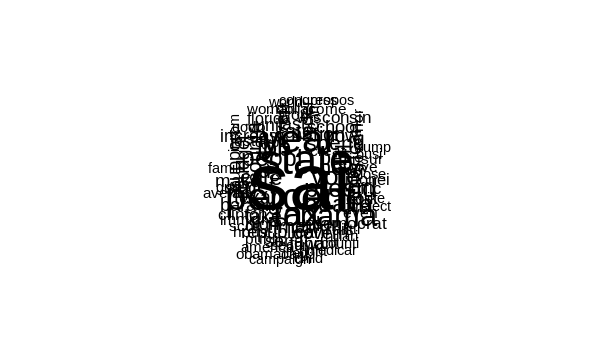

In [197]:
# Text - ALL - Worldcloud
wc_text   <- wordcloud(voc_text$Word,   voc_text$Occurrences,   max.words = 100, random.order = FALSE)

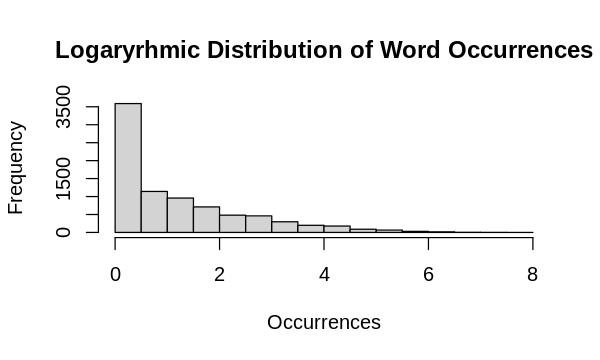

In [198]:
hist(log(voc_text$Occurrences),
     xlab = "Occurrences", ylab = "Frequency",
     main = "Logaryrhmic Distribution of Word Occurrences")

In [199]:
voc_5  <- voc_text[voc_text$Occurrences >= 5, ]
voc_10 <- voc_text[voc_text$Occurrences >= 10, ]
voc_15 <- voc_text[voc_text$Occurrences >= 15, ]
voc_20 <- voc_text[voc_text$Occurrences >= 20, ]
cat("Vocabulary  all words:",    nrow(voc_text))
cat("\nVocabulary >  5 words:",  nrow(voc_5))
cat("\nVocabulary > 10 words:", nrow(voc_10))
cat("\nVocabulary > 15 words:", nrow(voc_15))
cat("\nVocabulary > 20 words: ", nrow(voc_20))

Vocabulary  all words: 8231
Vocabulary >  5 words: 2540
Vocabulary > 10 words: 1609
Vocabulary > 15 words: 1212
Vocabulary > 20 words:  929

#### TRUE / KNOWN

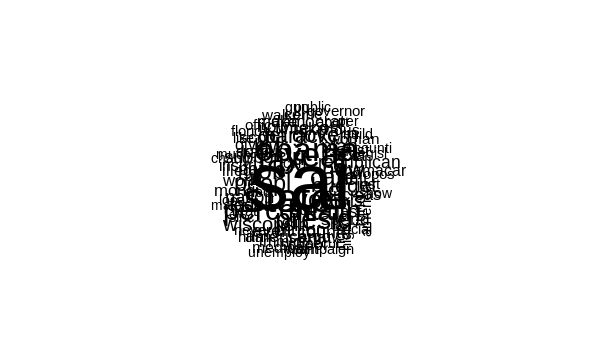

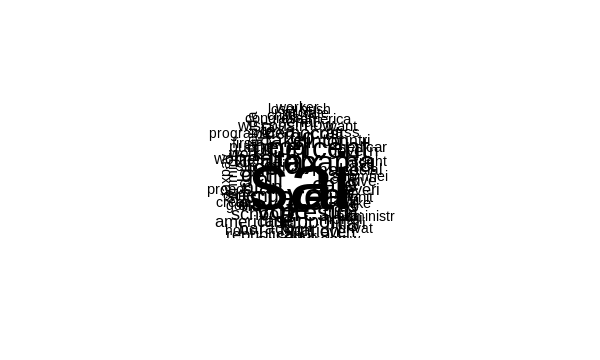

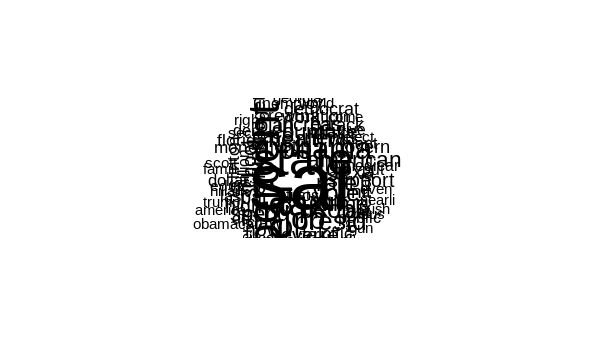

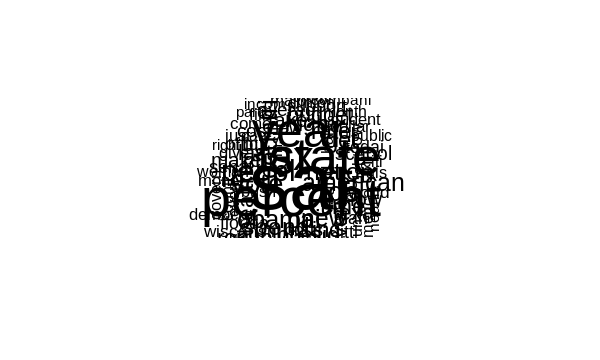

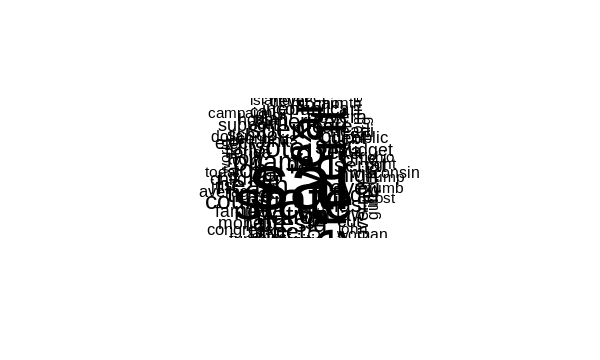

In [200]:
# Text - TRUE - Worldcloud
wc_text_1 <- wordcloud(voc_text_1$Word, voc_text_1$Occurrences, max.words = 100, random.order = FALSE)
wc_text_2 <- wordcloud(voc_text_2$Word, voc_text_2$Occurrences, max.words = 100, random.order = FALSE)
wc_text_3 <- wordcloud(voc_text_3$Word, voc_text_3$Occurrences, max.words = 100, random.order = FALSE)
wc_text_4 <- wordcloud(voc_text_4$Word, voc_text_4$Occurrences, max.words = 100, random.order = FALSE)
wc_text_5 <- wordcloud(voc_text_5$Word, voc_text_5$Occurrences, max.words = 100, random.order = FALSE)

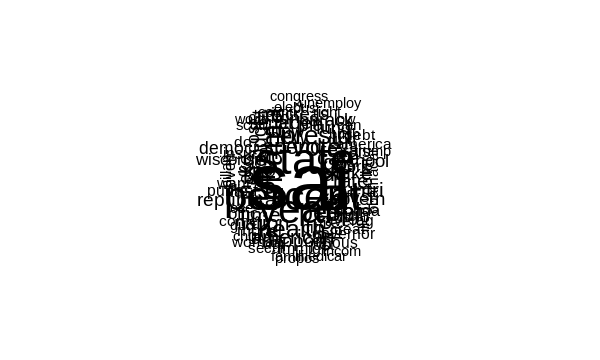

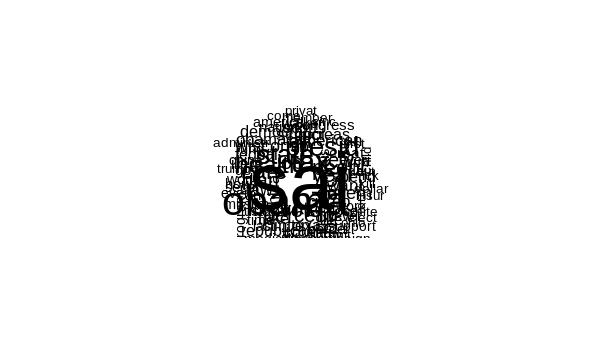

In [201]:
# Text - KNOWN - Worldcloud
wc_text_k <- wordcloud(voc_text_k$Word, voc_text_k$Occurrences, max.words = 100, random.order = FALSE)
wc_text_u <- wordcloud(voc_text_u$Word, voc_text_u$Occurrences, max.words = 100, random.order = FALSE)

**Observations:**<br>
- healthcare seems to have more misinformation
- economy has more truthful posts
- budget / immigration is often unknown
- healthcare / econmy is known
- in text, when percentages are used it is more truthful

### **2.5 Split into Training / Test / Validation**

In [202]:
# FEATURE SELECTION (ONLY MORE THAN 10)
voc_train <- voc_text[voc_text$Occurrences >= 100, ]

In [203]:
set.seed(42)
# 80% training /20% test
trainIndex <- createDataPartition(data1_cleaned$label, p = 0.7, list = FALSE)
train_data <- data1_cleaned[trainIndex, ]

test_data <- data1_cleaned[-trainIndex, ]

In [204]:
cat("Train Set Size:", nrow(train_data))
cat("\nTest  Set Size:", nrow(test_data))

Train Set Size: 7170
Test  Set Size: 3070

In [205]:
# train
corpus_train  <- Corpus(VectorSource(train_data$text))
dtm_train     <- DocumentTermMatrix(corpus_train, control = list(dictionary = voc_train$Word))
X_train       <- as.data.frame(as.matrix(dtm_train))
Y_train       <- train_data$label
Y_train_true  <- train_data$true
Y_train_known <- train_data$known

In [206]:
# test
corpus_test  <- Corpus(VectorSource(test_data$text))
dtm_test     <- DocumentTermMatrix(corpus_test, control = list(dictionary = voc_train$Word))
X_test       <- as.data.frame(as.matrix(dtm_test))
Y_test       <- test_data$label
Y_test_true  <- test_data$true
Y_test_known <- test_data$known

# **3 - Part 1: NBC**

We implement a Multinomial Naive Bayes classifier using the naivebayes package, which provides functions specifically for this purpose. Here's a step-by-step guide on how to use the naivebayes package to build and apply a Multinomial Naive Bayes classifier:

-Ensure that your data is in a format suitable for text classification. Typically, you would have a matrix or data frame where each row represents a document, and each column represents a feature (e.g., word counts, TF-IDF values). Make sure the response variable (class labels) is encoded as a factor.

-Split the data into training and testing sets: Divide your data into a training set and a testing set. The training set will be used to train the classifier, while the testing set will be used to evaluate its performance.

-Train the Multinomial Naive Bayes classifier:

-Predict using the trained model:

-Evaluate the performance of the classifier:

Replace testing_labels with the true class labels of the testing data. The above code calculates the accuracy of the classifier by comparing the predicted labels with the true labels.

That's a basic outline of how to implement Multinomial Naive Bayes classifier in R using the naivebayes package.

# Naive Bayes methods
 are a set of supervised learning algorithms based on applying Bayes’
theorem with the “naive” assumption of conditional independence between every pair of
features given the value of the class variable. Bayes’ theorem states the following relationship,
given class variable y and dependent feature vector x1 through xn:


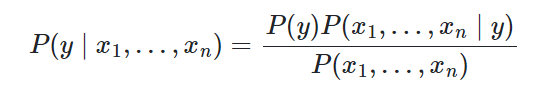

Using the naive conditional independence assumption that

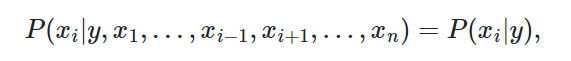

In [ ]:
head(X_train,2)

,abort,sai,support,bush,clinton,give,hillari,john,mccain,vote,⋯,per,back,run,big,allow,white,u,go,us,do
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0


## **3.1 - Self Made**

### **Classifier**

$P(Label|Features) = \frac{P(Features|Label)*P(Label))}{ P(Features)} $


Get the occurence of each word in each label as follows:

In [207]:
# Add Label to DF to DocumentTermMatrix
cf <- cbind(X_train, Y_train)
# group by labels + summing over words
cf <- aggregate(.~Y_train, cf, sum)

In [208]:
head(cf,6)

,Y_train,abort,sai,support,bush,clinton,give,hillari,john,mccain,⋯,per,back,run,big,allow,white,u,go,us,do
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,9,203,15,4,19,10,18,12,5,⋯,2,9,10,8,11,10,0,0,0,0
2,1,24,394,52,22,37,32,22,19,12,⋯,23,13,20,13,17,15,0,0,0,0
3,2,17,400,57,20,51,28,33,19,16,⋯,15,16,13,13,21,17,0,0,0,0
4,3,22,404,54,29,43,32,32,24,13,⋯,27,15,16,20,25,19,0,0,0,0
5,4,8,329,43,27,31,27,22,13,15,⋯,26,19,19,12,16,12,0,0,0,0
6,5,18,272,33,19,12,16,7,21,28,⋯,19,14,12,10,12,6,0,0,0,0


In [209]:
# Add one for all (theory)
cf <- cf + 1
# correction
cf$Y_train <- cf$Y_train - 1

In [210]:
head(cf,6)

,Y_train,abort,sai,support,bush,clinton,give,hillari,john,mccain,⋯,per,back,run,big,allow,white,u,go,us,do
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,10,204,16,5,20,11,19,13,6,⋯,3,10,11,9,12,11,1,1,1,1
2,1,25,395,53,23,38,33,23,20,13,⋯,24,14,21,14,18,16,1,1,1,1
3,2,18,401,58,21,52,29,34,20,17,⋯,16,17,14,14,22,18,1,1,1,1
4,3,23,405,55,30,44,33,33,25,14,⋯,28,16,17,21,26,20,1,1,1,1
5,4,9,330,44,28,32,28,23,14,16,⋯,27,20,20,13,17,13,1,1,1,1
6,5,19,273,34,20,13,17,8,22,29,⋯,20,15,13,11,13,7,1,1,1,1


In [211]:
# PRIOR: add label distribution (probability)
cf$prior  <- df_counts$Count / sum(df_counts$Count)
head(cf,6)

,Y_train,abort,sai,support,bush,clinton,give,hillari,john,mccain,⋯,back,run,big,allow,white,u,go,us,do,prior
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,10,204,16,5,20,11,19,13,6,⋯,10,11,9,12,11,1,1,1,1,0.08193359
2,1,25,395,53,23,38,33,23,20,13,⋯,14,21,14,18,16,1,1,1,1,0.19482422
3,2,18,401,58,21,52,29,34,20,17,⋯,17,14,14,22,18,1,1,1,1,0.16152344
4,3,23,405,55,30,44,33,33,25,14,⋯,16,17,21,26,20,1,1,1,1,0.20644531
5,4,9,330,44,28,32,28,23,14,16,⋯,20,20,13,17,13,1,1,1,1,0.19160156
6,5,19,273,34,20,13,17,8,22,29,⋯,15,13,11,13,7,1,1,1,1,0.16367187


In [212]:
# CONDITIONAL PROB: sum of all occurences
cf[, -c(1, ncol(cf))] <- cf[, -c(1, ncol(cf))] / rowSums(cf[, -c(1, ncol(cf))])
# excep Y_train and prior (1st and last column)
head(cf,6)

,Y_train,abort,sai,support,bush,clinton,give,hillari,john,mccain,⋯,back,run,big,allow,white,u,go,us,do,prior
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0.003742515,0.07634731,0.005988024,0.001871257,0.007485030,0.004116766,0.007110778,0.004865269,0.002245509,⋯,0.003742515,0.004116766,0.003368263,0.004491018,0.004116766,0.0003742515,0.0003742515,0.0003742515,0.0003742515,0.08193359
2,1,0.003917267,0.06189282,0.008304607,0.003603886,0.005954246,0.005170793,0.003603886,0.003133814,0.002036979,⋯,0.002193670,0.003290505,0.002193670,0.002820432,0.002507051,0.0001566907,0.0001566907,0.0001566907,0.0001566907,0.19482422
3,2,0.003074821,0.06850017,0.009907755,0.003587291,0.008882815,0.004953878,0.005807995,0.003416467,0.002903997,⋯,0.002903997,0.002391527,0.002391527,0.003758114,0.003074821,0.0001708234,0.0001708234,0.0001708234,0.0001708234,0.16152344
4,3,0.003016393,0.05311475,0.007213115,0.003934426,0.005770492,0.004327869,0.004327869,0.003278689,0.001836066,⋯,0.002098361,0.002229508,0.002754098,0.003409836,0.002622951,0.0001311475,0.0001311475,0.0001311475,0.0001311475,0.20644531
5,4,0.001296270,0.04752989,0.006337318,0.004032839,0.004608959,0.004032839,0.003312689,0.002016419,0.002304479,⋯,0.002880599,0.002880599,0.001872389,0.002448509,0.001872389,0.0001440300,0.0001440300,0.0001440300,0.0001440300,0.19160156
6,5,0.003401970,0.04888093,0.006087735,0.003581021,0.002327663,0.003043868,0.001432408,0.003939123,0.005192480,⋯,0.002685765,0.002327663,0.001969561,0.002327663,0.001253357,0.0001790510,0.0001790510,0.0001790510,0.0001790510,0.16367187


In [213]:
# Extract prio and label
prior <- cf$prior
label <- cf$Y_train
cf$Y_train <- NULL
cf$prior <- NULL

In [214]:
head(cf,6)

,abort,sai,support,bush,clinton,give,hillari,john,mccain,vote,⋯,per,back,run,big,allow,white,u,go,us,do
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.003742515,0.07634731,0.005988024,0.001871257,0.007485030,0.004116766,0.007110778,0.004865269,0.002245509,0.012350299,⋯,0.001122754,0.003742515,0.004116766,0.003368263,0.004491018,0.004116766,0.0003742515,0.0003742515,0.0003742515,0.0003742515
2,0.003917267,0.06189282,0.008304607,0.003603886,0.005954246,0.005170793,0.003603886,0.003133814,0.002036979,0.014728925,⋯,0.003760577,0.002193670,0.003290505,0.002193670,0.002820432,0.002507051,0.0001566907,0.0001566907,0.0001566907,0.0001566907
3,0.003074821,0.06850017,0.009907755,0.003587291,0.008882815,0.004953878,0.005807995,0.003416467,0.002903997,0.019303041,⋯,0.002733174,0.002903997,0.002391527,0.002391527,0.003758114,0.003074821,0.0001708234,0.0001708234,0.0001708234,0.0001708234
4,0.003016393,0.05311475,0.007213115,0.003934426,0.005770492,0.004327869,0.004327869,0.003278689,0.001836066,0.009311475,⋯,0.003672131,0.002098361,0.002229508,0.002754098,0.003409836,0.002622951,0.0001311475,0.0001311475,0.0001311475,0.0001311475
5,0.001296270,0.04752989,0.006337318,0.004032839,0.004608959,0.004032839,0.003312689,0.002016419,0.002304479,0.012530606,⋯,0.003888809,0.002880599,0.002880599,0.001872389,0.002448509,0.001872389,0.0001440300,0.0001440300,0.0001440300,0.0001440300
6,0.003401970,0.04888093,0.006087735,0.003581021,0.002327663,0.003043868,0.001432408,0.003939123,0.005192480,0.013786929,⋯,0.003581021,0.002685765,0.002327663,0.001969561,0.002327663,0.001253357,0.0001790510,0.0001790510,0.0001790510,0.0001790510


### **Predictor**

In [215]:
# TEST
random_index <- sample(nrow(X_test), 1)
random_datapoint <- X_test[random_index, ]

In [216]:

# Remove the label column from cf
cf_without_label <- cf[, -1]

# Calculate the likelihood
ll <- sweep(cf_without_label, 2, unlist(random_datapoint), "*")

# Display the result
ll


Warning message in sweep(cf_without_label, 2, unlist(random_datapoint), "*"):
“STATS is longer than the extent of 'dim(x)[MARGIN]'”


sai,support,bush,clinton,give,hillari,john,mccain,vote,care,⋯,per,back,run,big,allow,white,u,go,us,do
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [217]:
new_instance <- random_datapoint
#predictLabel <- function(new_instance, cf, prior) {
# Exclude 0-valued features from the instance
non_zero_features <- new_instance != 0
instance <- new_instance[non_zero_features]

# Calculate likelihoods
likelihoods <- apply(cf[, non_zero_features], 1, function(row) {
  prod(row[instance != 0])
})

# Calculate posterior probabilities
posterior_probs <- prior * likelihoods

# Normalize
posterior_probs <- posterior_probs / sum(posterior_probs)

# Predict
predicted_label <- names(posterior_probs)[which.max(posterior_probs)]

# return(predicted_label)
#}
predicted_label

NULL

In [219]:
likelihoods <- apply(random_datapoint, 1, function(instance) {
  prod(cf[instance != 0, ])
})
print(likelihoods)

2116 
  NA 


In [220]:
posterior_probs <- prior * likelihoods
posterior_probs <- posterior_probs / sum(posterior_probs)
print(posterior_probs)

[1] NA NA NA NA NA NA


In [221]:
predicted_label <- names(posterior_probs)[which.max(posterior_probs)]
print(predicted_label)

NULL


In Practise now:

In [222]:
# Add Label to DF to DocumentTermMatrix
cf <- cbind(X_train, Y_train)

# Group by labels + summing over words
cf <- aggregate(. ~ Y_train, cf, sum)

# Define the predictLabel function
predictLabel <- function(data_point, cf, prior) {
  # Calculate the likelihood
  ll <- sweep(cf[, -1], 2, unlist(data_point), "*")

  # Multiply with prior probabilities
  posterior <- ll * prior

  # Calculate the class label with maximum probability
  predicted_label <- colnames(posterior)[which.max(rowSums(posterior))]

  return(predicted_label)
}

# Set prior probabilities
prior <- table(Y_train) / length(Y_train)

# Predict labels for test set
Y_test_pred <- vector(length = nrow(X_test))
for (i in 1:nrow(X_test)) {
  Y_test_pred[i] <- predictLabel(X_test[i, ], cf, prior)
}


In [224]:
Predict <- function(nbc, X_test){
#     cat("words matching:", all(colnames(nbc[2:as.numeric(ncol(nbc)-2)]) == colnames(X_test)))
    df.one.func <- function(x){

        df.one <- nbc[, c(1, ncol(nbc), which(x != 0) + 1)]

        power       <-  c(1,1,  as.integer(x[which(x != 0 )]))
        power.func  <- function(x){return(x <- x**power)} #each prob to the power of repeatence
        df.one      <- t(apply(df.one ,1, power.func))           #applyting the power function
        df.one      <- data.frame(df.one)

        prob.finder <- function(x){return(prod(x[2:length(x)]))}
        df.final    <-cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder))

        predicted_label <- df.finalLabel[which(df.finallabel.Prob == max(df.final$Label.Prob))]
        predicted_label <- as.data.frame(predicted_label)
        predicted_label <- t(predicted_label[1,])
        return(predicted_label)}


    X_test_all<- cbind(X_test, predicted_label= apply(X_test ,1,df.one.func))
    return(X_test_all$predicted_label)}


In [225]:
fn_accuracy <- function(train_res, test_data){
    N_correct <- 0
    predictions <- numeric(nrow(test_data))

    for (i in seq_along(test_data$Text)) {
        predictions[i] <- applyMultinomialNB(
            test_data[[i, 'Text']],
            labels,
            train_res,
            prior
        )

        as.integer(
            predictions[i] == test_data[[i, 'Labels']]
        ) + N_correct -> N_correct
    }

    # output data
    out_data <- NULL
    out_data$predictions <- predictions

    return(out_data)
}


In [226]:
Y_test_pred

[1] "bush"    "bush"    "bush"    "support" "sai"     "bush"    "bush"   
   [8] "bush"    "clinton" "clinton" "bush"    "bush"    "abort"   "bush"   
  [15] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [22] "bush"    "bush"    "sai"     "bush"    "bush"    "bush"    "bush"   
  [29] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [36] "bush"    "give"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [43] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [50] "bush"    "give"    "bush"    "bush"    "bush"    "clinton" "bush"   
  [57] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [64] "sai"     "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [71] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [78] "bush"    "clinton" "bush"    "bush"    "bush"    "bush"    "bush"   
  [85] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
  [92] "bush"    "bush"    "bush"    "bush"    "clinton" "bush"    "bush"   
  [99] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [106] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [113] "bush"    "bush"    "bush"    "bush"    "sai"     "bush"    "bush"   
 [120] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [127] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "clinton"
 [134] "bush"    "bush"    "sai"     "bush"    "bush"    "sai"     "clinton"
 [141] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [148] "bush"    "bush"    "bush"    "bush"    "clinton" "bush"    "bush"   
 [155] "bush"    "bush"    "bush"    "bush"    "clinton" "bush"    "bush"   
 [162] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [169] "bush"    "bush"    "bush"    "bush"    "clinton" "bush"    "bush"   
 [176] "bush"    "sai"     "give"    "bush"    "bush"    "bush"    "bush"   
 [183] "sai"     "sai"     "bush"    "bush"    "bush"    "abort"   "bush"   
 [190] "bush"    "bush"    "clinton" "bush"    "bush"    "abort"   "bush"   
 [197] "clinton" "bush"    "bush"    "bush"    "sai"     "bush"    "bush"   
 [204] "bush"    "bush"    "bush"    "bush"    "bush"    "abort"   "bush"   
 [211] "bush"    "bush"    "sai"     "bush"    "bush"    "bush"    "bush"   
 [218] "support" "bush"    "bush"    "bush"    "bush"    "give"    "bush"   
 [225] "bush"    "bush"    "bush"    "clinton" "bush"    "bush"    "bush"   
 [232] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "sai"    
 [239] "sai"     "clinton" "bush"    "bush"    "bush"    "bush"    "bush"   
 [246] "bush"    "bush"    "clinton" "bush"    "bush"    "bush"    "bush"   
 [253] "bush"    "clinton" "bush"    "bush"    "bush"    "bush"    "bush"   
 [260] "clinton" "bush"    "bush"    "bush"    "bush"    "clinton" "bush"   
 [267] "bush"    "bush"    "bush"    "abort"   "bush"    "bush"    "bush"   
 [274] "bush"    "clinton" "bush"    "sai"     "bush"    "bush"    "bush"   
 [281] "bush"    "bush"    "clinton" "bush"    "bush"    "bush"    "bush"   
 [288] "clinton" "bush"    "clinton" "bush"    "sai"     "bush"    "bush"   
 [295] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "sai"    
 [302] "bush"    "bush"    "bush"    "bush"    "bush"    "sai"     "bush"   
 [309] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [316] "bush"    "bush"    "clinton" "clinton" "bush"    "bush"    "abort"  
 [323] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "sai"    
 [330] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [337] "bush"    "bush"    "bush"    "bush"    "bush"    "bush"    "bush"   
 [344] "bush"    "sai"     "bush"    "bush"    "bush"    "give"    "bush"   
 [351] "bush"    "bush"    "clinton" "bush"    "bush"    "bush"    "bush"   
 [358] "clinton" "clinton" "bush"    "bush"    "clinton" "bush"    "bush"   

In [ ]:
# Calculate accuracy
accuracy <- sum(Y_test_pred == Y_test) / length(Y_test)
accuracy


[1] 0

## **3.2 - R Package e1071**

In [227]:
convert_counts <- function(x){x <- ifelse(x>0,"Yes","No") }
x_train <-  apply(X_train ,  MARGIN = 2,convert_counts)
x_test  <-  apply(X_test  ,  MARGIN = 2,convert_counts)

In [228]:
NBC <- naiveBayes(x_train, Y_train) #Navive Bayesian Classifer

Y_train_pred <- predict(NBC, x_train)
Y_pred       <- predict(NBC, x_test)

In [229]:
table_train <- table(Y_train_pred, Y_train)
table_train

# Calculate train accuracy
train_accuracy <- sum(diag(table_train)) / sum(table_train)

# Calculate test accuracy
table_test <- table(Y_pred, Y_test)
test_accuracy <- sum(diag(table_test)) / sum(table_test)

cat("Train accuracy:", train_accuracy)
cat("\nTest accuracy:", test_accuracy)


            Y_train
Y_train_pred   0   1   2   3   4   5
           0  91  69  62  52  45  34
           1 201 551 290 334 285 236
           2  95 175 306 177 140 111
           3  85 211 174 423 218 171
           4  66 234 217 304 488 304
           5  56 150 119 180 198 318

Train accuracy: 0.3036262
Test accuracy: 0.2410423

# NaiveBayes classifer from fastnaive library

In [230]:
# Install and load the required package
install.packages("fastNaiveBayes")
library(fastNaiveBayes)

# Train the model
fast.NBC <- fnb.multinomial(X_train, Y_train)

# Make predictions on the training and test sets
Y_train_pred <- predict(fast.NBC, X_train)
Y_pred <- predict(fast.NBC, X_test)

# Calculate train accuracy
train_accuracy <- sum(Y_train_pred == Y_train) / length(Y_train)

# Calculate test accuracy
test_accuracy <- sum(Y_pred == Y_test) / length(Y_test)

cat("Train accuracy:", train_accuracy)
cat("\nTest accuracy:", test_accuracy)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Train accuracy: 0.292887
Test accuracy: 0.2270358

In [ ]:
#nbc_model <- naiveBayes(X_train, Y_train)

In [ ]:
# TEST
#predictions_test <- predict(nbc_model, X_test)
#accuracy_test    <- sum(predictions_test == Y_test) / length(predictions_test)
#cat("Accuracy on the test set:", accuracy_test, "\n")

In [ ]:
#label_accuracy <- sapply(unique(Y_test), function(label) {
#  true_indices <- Y_test == label
#  predicted_labels <- predictions_test[true_indices]
#  true_labels <- Y_test[true_indices]
#  accuracy <- sum(predicted_labels == true_labels) / length(predicted_labels)
#  accuracy
#})

# Print the accuracy for each label
#cat("Accuracy for each label in the test set:\n")
#for (i in 1:length(unique(Y_test))) {
#  cat("Label", i, ": ", label_accuracy[i], "\n")
#}

# **4 - Part 2: Bionominal & Continuous**


##4.1Bionominal & Continuous**

In [223]:
DF <- read.csv("train.csv")

In [231]:
#=======filtering the dataset keeping just the label 5:true and 1:false========#

label.list <- c(1,5)   #the labels:0,1,2,3,4,5

#==============================================================================#

options(repr.plot.width=5, repr.plot.height =3)    #changing size of plots
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
cat("filtered dataset size:", nrow(df))
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function


filtered dataset size: 3671

In [232]:
install.packages("gmodels")

library(gmodels)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [233]:
# Define or load the necessary function df_cleaner()
df_cleaner <- function(df, threshold, minfreq, binom) {
  # Implementation of df_cleaner function
  cleaned_df <- df  # Placeholder, replace with actual cleaning logic
  # ...
  # Return the cleaned dataframe
  return(cleaned_df)
}

# Define or load the necessary functions for train/test splitting, training, and prediction
train_test_splitter <- function(data, test_ratio, SEED) {
  # Set the seed for reproducibility
  set.seed(SEED)

  # Generate random indices for train and test split
  indices <- sample(nrow(data), size = floor(test_ratio * nrow(data)))

  # Split the data into train and test sets
  train_set <- data[-indices, ]
  test_set <- data[indices, ]

  # Split the features and labels
  X_train <- train_set[, -ncol(train_set)]
  Y_train <- train_set[, ncol(train_set)]
  X_test <- test_set[, -ncol(test_set)]
  Y_test <- test_set[, ncol(test_set)]

  # Return the train and test datasets
  return(list(X_train, X_test, Y_train, Y_test))
}

Train <- function(X_train, Y_train) {
  # Implementation of the training function
  # Train the Naive Bayes model using X_train and Y_train
  model <- naiveBayes(X_train, Y_train)
  # Return the trained model
  return(model)
}

Predict <- function(model, data) {
  # Implementation of the prediction function
  # Predict labels using the Naive Bayes model
  predicted_labels <- predict(model, newdata = data)
  # Return the predicted labels
  return(predicted_labels)
}

# Clean the dataframe
df_dtm <- df_cleaner(df, threshold = 0.3, minfreq = 10, binom = TRUE)

# Split the data into train and test sets
data_splits <- train_test_splitter(df_dtm, test_ratio = 0.15, SEED = 5)
X_train <- data_splits[[1]]
X_test <- data_splits[[2]]
Y_train <- data_splits[[3]]
Y_test <- data_splits[[4]]

# Train the Naive Bayes classifier
nbc <- Train(X_train, Y_train)

# Make predictions on the training and test sets
Y_pred_train <- Predict(nbc, X_train)
Y_pred <- Predict(nbc, X_test)


In [234]:
# Calculate accuracy
train_accuracy <- sum(Y_train == Y_pred_train) / length(Y_train)
test_accuracy <- sum(Y_test == Y_pred) / length(Y_test)

# Print accuracy
cat("Train accuracy:", train_accuracy)
cat("\nTest accuracy:", test_accuracy)


Train accuracy: 0.08586991
Test accuracy: 0.005454545

# Conclusion
In this project, our aim was to develop a Naive Bayes Classifier to differentiate between trustworthy and unreliable news articles. Initially, we implemented a multinomial classifier and created the training and prediction components. The training dataset was utilized to construct a model, which was then employed to test new samples using our predict function. While we observed some improvement when transitioning from a multinomial to a binomial scenario, the achieved accuracy in both cases was not satisfactorily high. We believe that obtaining a larger dataset would be beneficial to enhance the accuracy of the model by enabling more comprehensive training.

# TEST